# Viewing the dataset

This notebook demonstrates how to access metadata and arrays from the HDF5 dataset.

In [78]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Open the dataset

Make sure to update the filepath in the block below!

In [79]:
h5_filepath = '/data/bwedig/mejiro/roman_hlwas_wide_dev_v_0_1.h5'  # TODO update this path!
f = h5py.File(h5_filepath, 'r')

In [80]:
# print all attributes for the root group
for key, value in f.attrs.items():
    print(f"{key}: {value}")

author: ['bwedig@astromusers.wustl.edu' 'username@host for calculation']
created: 2025_06_11-03_37_39_PM
dataset_version: 0.1
mejiro_version: ['2.0.0' 'mejiro version']


# The `images` group

This group contains metadata about each strong lens system (e.g., redshifts, Einstein radius, SNR, etc.) and synthetic images and exposures for each filter.

In [81]:
# print all attributes for the "images" group
for key, value in f['images'].attrs.items():
    print(f"{key}: {value}")

galsim_version: ['2.5.1' 'GalSim version']
lenstronomy_version: ['1.13.0' 'lenstronomy version']
mejiro_version: ['2.0.0' 'mejiro version']
slsim_version: ['0.1.0' 'SLSim version']
stpsf_version: ['2.0.0' 'STPSF version']


## Retrieve the metadata for a given system

In [106]:
# select a system by the unique identifier assigned to it by mejiro
uid = f'{str(5).zfill(8)}'  # for this version of the dataset, it's a zero-padded string of eight digits

# print all attributes for the "strong_lens" group
for key, value in f['images'][f'strong_lens_{uid}'].attrs.items():
    print(f"{key}: {value}")

detector: ['1' 'Detector']
detector_position_x: ['409' 'Detector X position']
detector_position_y: ['3679' 'Detector Y position']
main_halo_mass: ['402303042434424.8' 'Lens galaxy main halo mass [M_sun]']
subhalos: ['False' 'Are subhalos present in this lens?']
theta_e: ['1.2022297104209831' 'Einstein radius [arcsec]']
z_lens: ['3.1344535735522285' 'Lens galaxy redshift']
z_source: ['5.899777281007144' 'Source galaxy redshift']


## View synthetic image and exposure

filter: ['F158' 'Filter']
fov: ['10.01' 'Field of view [arcsec]']
lens_magnitude: ['22.581303502051963' 'Lens galaxy magnitude']
lensed_source_magnitude: ['22.0482355836032' 'Lensed source galaxy magnitude']
pixel_scale: ['0.11' 'Pixel scale [arcsec/pixel]']
source_magnitude: ['24.028919500345243' 'Unlensed source galaxy magnitude']
units: ['Counts/sec' 'Units of pixel values']


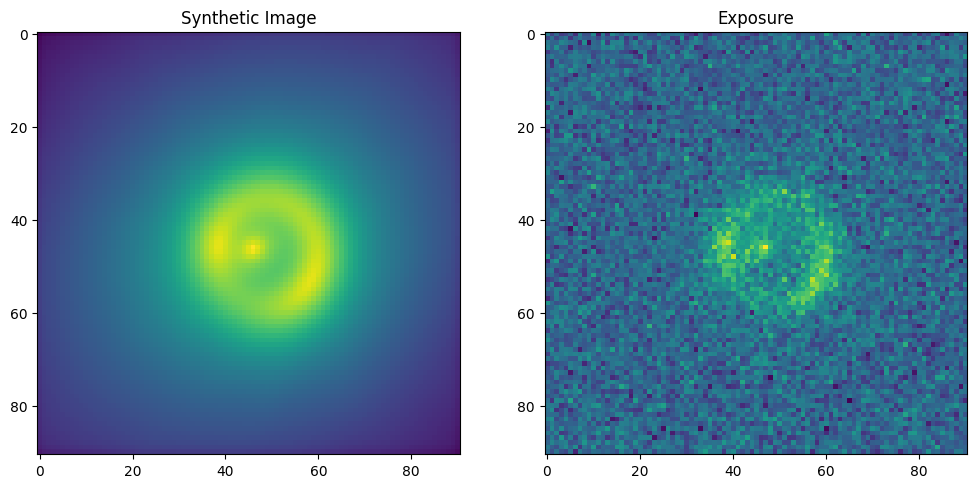

In [107]:
# specify band
band = 'F158'

# retrieve
exposure = f['images'][f'strong_lens_{uid}'][f'exposure_{uid}_{band}']
synthetic_image = f['images'][f'strong_lens_{uid}'][f'synthetic_image_{uid}_{band}']

# print all attributes for this dataset
for key, value in exposure.attrs.items():
    print(f"{key}: {value}")

# show exposure
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(np.log10(synthetic_image))
ax[0].set_title('Synthetic Image')
ax[1].imshow(np.log10(exposure))
ax[1].set_title('Exposure')
plt.show()

# View SNR array

Each pixel is the SNR in that pixel (see paper for how we compute SNR). The region(s) where per pixel SNR > 1 are where the overall SNR of the system is calculated from, as well as where we additionally supersample by a factor of three to get the flux sufficiently accurate. See the paper for details.

In [108]:
# # retrieve SNR array
# snr_array = f['images'][f'strong_lens_{uid}'][f'snr_array_{uid}']

# # show SNR array
# plt.imshow(snr_array)
# plt.colorbar(label='SNR')
# plt.title(f'SNR Array for Strong Lens {uid}')
# plt.show()

# The `psfs` group

This group contains the PSFs

In [109]:
# print all attributes for the "psfs" group
for key, value in f['psfs'].attrs.items():
    print(f"{key}: {value}")

mejiro_version: ['2.0.0' 'mejiro version']
stpsf_version: ['2.0.0' 'STPSF version']


## View a PSF

We'll retrieve the PSF associated with the image we looked at above.

In [110]:
# retrieve the detector and detector position metadata, which are attributes on the "strong_lens" group
detector = f['images'][f'strong_lens_{uid}'].attrs['detector'][0]
detector_position_x = f['images'][f'strong_lens_{uid}'].attrs['detector_position_x'][0]
detector_position_y = f['images'][f'strong_lens_{uid}'].attrs['detector_position_y'][0]

print(f"Detector: {detector}")
print(f"Detector Position (x): {detector_position_x}")
print(f"Detector Position (y): {detector_position_y}")

Detector: 1
Detector Position (x): 409
Detector Position (y): 3679


detector: ['1' 'Detector']
detector_position_x: ['409' 'Detector X position']
detector_position_y: ['3679' 'Detector Y position']
fov_pixels: ['101' 'See STPSF documentation']
oversample: ['5' 'See STPSF documentation']


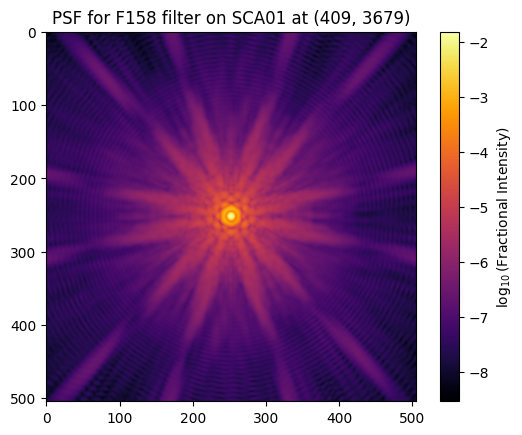

In [111]:
# retrieve the PSF
psf = f['psfs'][f'sca{str(detector).zfill(2)}'][f'psf_{detector}_{detector_position_x}_{detector_position_y}_{band}']

# print all attributes for this dataset
for key, value in psf.attrs.items():
    print(f"{key}: {value}")

# show PSF
plt.imshow(np.log10(psf), cmap='inferno')
plt.colorbar(label=r'$\log_{10}(\text{Fractional Intensity})$')
plt.title(f'PSF for {band} filter on SCA{str(detector).zfill(2)} at ({detector_position_x}, {detector_position_y})')
plt.show()